Эксперимент 3.2 провести на основе следующих данных: q = 1, w = 1, … ,100 с шагом 1, n = 10^6, заполнение массива a: 1 - псевдослучайное, 2 - по возрастанию, 3 - по убыванию. (нарисовать графики функций TА(n) и ТВ(n) для всех трех случаев).

In [1]:
import time
import copy
import random as rd
import matplotlib.pyplot as plt

from sort import k_merge_sort, d_heap_sort


q = 1
n = 1_000_000
low_w, high_w, step = 1, 100, 1
x_ax = [w for w in range(low_w, high_w, step)]

In [49]:
""" создание массива случайных чисел """
arr1_r = [[]] * ((high_w - low_w) // step)
arr2_r = []

index = 0
for w in range(low_w, high_w, step):
    sub_arr = []
    for _ in range(n):
        sub_arr.append(rd.randint(q,w))
    arr1_r[index] = sub_arr
    index += 1
arr2_r = copy.deepcopy(arr1_r)

In [51]:
""" создание массива с числами по возрастанию """
arr1_g = [[]] * ((high_w - low_w) // step)
arr2_g = []

for i in range(len(arr1_r)):
    arr1_g[i] = copy.deepcopy(arr1_r[i])
    arr1_g[i].sort()
arr2_g = copy.deepcopy(arr1_g)

In [58]:
""" создание массива с числами по неубыванию """
arr1_l = [[]] * ((high_w - low_w) // step)
arr2_l = []

for i in range(len(arr1_g)):
    arr1_l[i] = copy.deepcopy(arr1_g[i])
    arr1_l[i][::-1]
arr2_l = copy.deepcopy(arr1_l)

In [64]:
""" сортировка массивов с псевдослучаными числами """
heap_rand_times = []
for a in arr1_r:
    start = time.time()
    d_heap_sort(a, 3)
    end = time.time()
    heap_rand_times.append(end-start)

merge_rand_times = []
for a in arr2_r:
    start = time.time()
    k_merge_sort(a, 4)
    end = time.time()
    merge_rand_times.append(end-start)

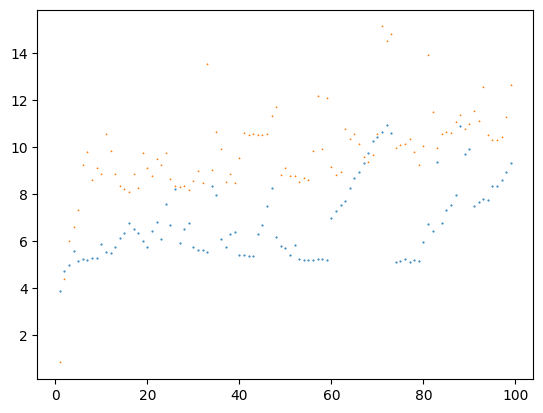

In [66]:
""" графика времени работы """
plt.plot(x_ax, merge_rand_times, 'o', markersize = 0.5)
plt.plot(x_ax, heap_rand_times, 'v', markersize = 0.5)

In [67]:
""" сортировка массивов с числами по возрастанию """
heap_greate_times = []
for a in arr1_g:
    start = time.time()
    d_heap_sort(a, 3)
    end = time.time()
    heap_greate_times.append(end-start)

merge_greate_times = []
for a in arr2_g:
    start = time.time()
    k_merge_sort(a, 4)
    end = time.time()
    merge_greate_times.append(end-start)

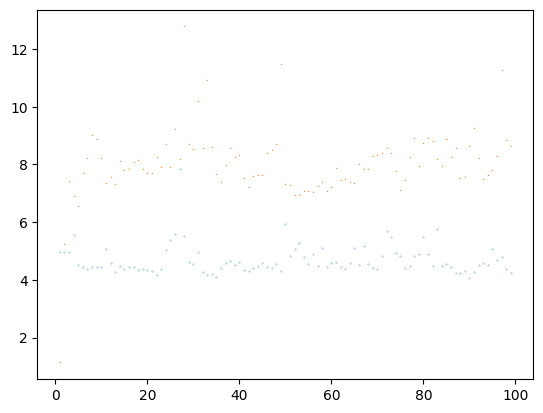

In [68]:
""" график времени работы """
plt.plot(x_ax, merge_greate_times, 'o', markersize = 0.3)
plt.plot(x_ax, heap_greate_times, 'v', markersize = 0.3)

In [69]:
""" сортировка массивов с числами по убыванию """
heap_lower_times = []
for a in arr1_l:
    start = time.time()
    d_heap_sort(a, 3)
    end = time.time()
    heap_lower_times.append(end-start)

merge_lower_times = []
for a in arr2_l:
    start = time.time()
    k_merge_sort(a, 4)
    end = time.time()
    merge_lower_times.append(end-start)

In [ ]:
""" графика времени работы """
plt.plot(x_ax, merge_lower_times, 'o', markersize = 0.3)
plt.plot(x_ax, heap_lower_times, 'v', markersize = 0.3)

In [ ]:
""" Графики по всем 3 наполнениям массивов """
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6, 18))

l1, = ax1.plot(x_ax, merge_rand_times, 'o', markersize=0.3)
l2, = ax1.plot(x_ax, heap_rand_times, 'v', markersize=0.3)
ax1.legend([l1, l2], ['4 merge sort', '3 heap sort'])
ax1.set_xlabel('верхняя граница значений w')
ax1.set_ylabel('время, с')
ax1.set_title('Массив псевдослучайных чисел')

l3, = ax2.plot(x_ax, merge_greate_times, 'o', markersize=0.3)
l4, = ax2.plot(x_ax, heap_greate_times, 'v', markersize=0.3)
ax2.legend([l3, l4], ['4 merge sort', '3 heap sort'])
ax2.set_xlabel('верхняя граница значений w')
ax2.set_ylabel('время, с')
ax2.set_title('Массив чисел расположенных по возрастанию')

l5, = ax3.plot(x_ax, merge_lower_times, 'o', markersize=0.3)
l6, = ax3.plot(x_ax, heap_lower_times, 'v', markersize=0.3)
ax3.legend([l3, l4], ['4 merge sort', '3 heap sort'])
ax3.set_xlabel('верхняя граница значений w')
ax3.set_ylabel('время, с')
ax3.set_title('Массив чисел расположенных по возрастанию')